# Линейная регрессия
- Линейная регрессия - это метод статистической регрессии, который используется для прогнозирующего анализа.
- Это один из очень простых алгоритмов, который работает с регрессией и показывает взаимосвязь между непрерывными переменными.
- Он используется для решения задачи регрессии в машинном обучении.
- Линейная регрессия показывает линейную зависимость между независимой переменной (ось X) и зависимой переменной (ось Y), поэтому называется линейной регрессией. если имеется только одна входная переменная (x), то такая линейная регрессия называется простой линейной регрессия. И если имеется более одной входной переменной, то такая линейная регрессия называется множественной линейной регрессией.


Мы рассмотрим продажи, основанные на маркетинговом бюджете телевидения. 
Мы построим модель линейной регрессии для прогнозирования продаж, используя "ТВ" в качестве предикторной переменной.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
marketing = pd.read_csv('Datasets/tvmarketing.csv')

In [3]:
marketing.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [4]:
marketing.tail()

,TV,Sales
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


In [5]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [6]:
marketing.shape

(200, 2)

In [7]:
marketing.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


<Axes: xlabel='TV', ylabel='Sales'>

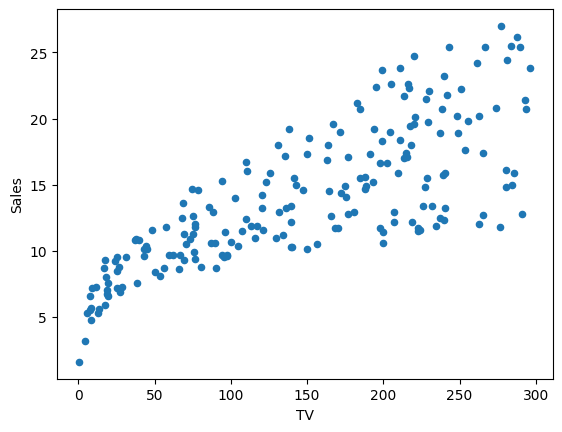

In [8]:
marketing.plot(x='TV', y='Sales', kind='scatter')

В целом шаги по созданию любой модели можно разделить следующим образом:

## Подготовка X и y

- Библиотека scikit-learn ожидает, что X (функциональная переменная) и y (переменная ответа) будут массивами NumPy.
- Однако X может быть фреймом данных, поскольку Pandas построен поверх NumPy.

In [16]:
# Присвоение переменной признака значения X
X = marketing['TV']
X.head()

0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
Name: TV, dtype: float64

In [17]:
# Присвоение переменной ответа значения y
y = marketing['Sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

# Для построения модели линейной регрессии используем sklearn

Установка sklearn:
**pip install scikit-learn**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [10]:
x = marketing["TV"].values.reshape(-1, 1)
y = marketing['Sales'].values.reshape(-1, 1)

## Разделение данных на обучающие и тестовые наборы

random_state - это начальное значение, используемое генератором случайных чисел, оно может быть любым целым числом.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=0)  # Разделим датасет на тренировочную и тестовую выборку

In [19]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 1)
(160, 1)
(40, 1)
(40, 1)


## Линейная регрессия

In [14]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)  # Обучим модельку линейной регрессии

LinearRegression()

## Расчет коэффициентов

In [20]:
print(regressor.intercept_)
print(regressor.coef_)

[7.29249377]
[[0.04600779]]


$y = 7.292 + 0.046 \times TV $<br>

## Прогноз нашей модели

In [21]:
y_pred = regressor.predict(x_test)  # Выболним предикт нашей модели

# Построение графика линейной регрессии

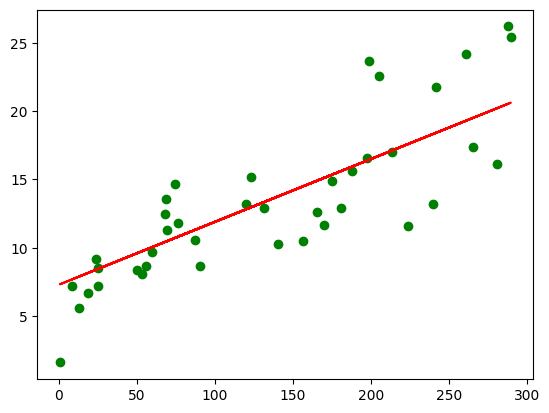

In [24]:
plt.scatter(x_test, y_test, color="green")
plt.plot(x_test, y_pred, color="red")
plt.show()

## Вычисление значений RMSE и R^2
RMSE - это стандартное отклонение ошибок, возникающих при прогнозировании набора данных. Это то же самое, что MSE (среднеквадратичная ошибка), но при определении точности модели учитывается корень из значения

In [22]:
y_test.shape

(40, 1)

Text(0, 0.5, 'Sales')

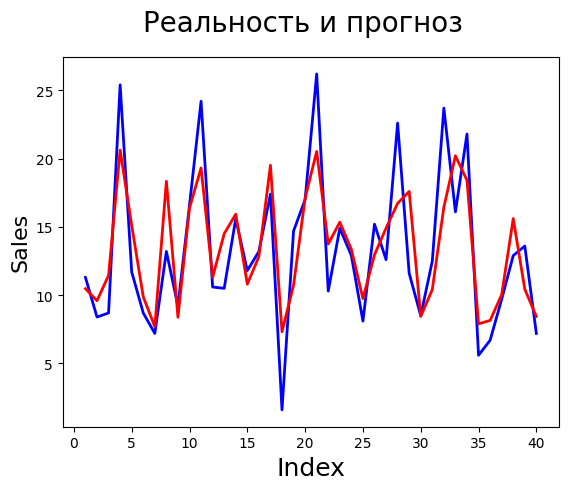

In [23]:
# Реальные и предсказанные результаты
import matplotlib.pyplot as plt

c = [i for i in range(1, 41, 1)]  # Генерируем индексы
fig = plt.figure()
plt.plot(c, y_test, color="blue", linewidth=2, linestyle="-")  # Синее - реальные данные
plt.plot(c, y_pred, color="red", linewidth=2, linestyle="-")  # Красное - прогноз
fig.suptitle('Реальность и прогноз', fontsize=20)
plt.xlabel('Index', fontsize=18)
plt.ylabel('Sales', fontsize=16)

In [25]:
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
print("R2: ", metrics.r2_score(y_test, y_pred))

MAE:  2.505418178966002
MSE:  10.186181934530211
R2:  0.6763151577939723


Значение mse = 10.18 означает, что данная модель ошибается на 10.18% значений
r2 означает, что наша модель имеет точность 67% по тестовым данным.